In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import statistics
from scipy import stats
plt.rcParams['figure.figsize'] =  [16,9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 15})

In [2]:
data = pd.read_csv("C:/Project/Project/out_1.csv")
data.head(5)

,name,price,rating,star
0,Điện thoại Vivo V23e,8490000,63,4.4
1,Điện thoại Realme C11 (2021),2990000,58,2.9
2,Điện thoại Samsung Galaxy A32,6490000,497,2.8
3,Điện thoại Samsung Galaxy A52 128GB,9290000,128,2.8
4,Điện thoại Samsung Galaxy Z Fold3 5G 256GB,41990000,9,4.8


In [3]:
# Xem thông tin dữ liệu data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    79 non-null     object 
 1   price   79 non-null     int64  
 2   rating  79 non-null     int64  
 3   star    79 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.6+ KB


In [4]:
data.isnull().sum()

name      0
price     0
rating    0
star      0
dtype: int64

In [5]:
data.describe()

,price,rating,star
count,7.900000e+01,79.000000,79.000000
mean,9.330506e+06,169.291139,3.388608
std,6.562042e+06,181.672793,0.573784
min,2.990000e+06,5.000000,2.200000
25%,4.990000e+06,55.500000,3.050000
50%,7.490000e+06,107.000000,3.300000
75%,1.054000e+07,224.000000,3.800000
max,4.199000e+07,905.000000,4.800000


In [6]:
print("Giá trị trung bình của data:")
pd.DataFrame(data.mean())

Giá trị trung bình của data:


,0
price,9.330506e+06
rating,1.692911e+02
star,3.388608e+00


In [7]:
print('min của data:')
pd.DataFrame(data.min(skipna= True, numeric_only= True))

min của data:


,0
price,2990000.0
rating,5.0
star,2.2


In [8]:
print('max của data:')
pd.DataFrame(data.max(skipna= True, numeric_only= True))

max của data:


,0
price,41990000.0
rating,905.0
star,4.8


In [9]:
print("Giá trị median của data:")
pd.DataFrame(data.median())

Giá trị median của data:


,0
price,7490000.0
rating,107.0
star,3.3


In [11]:
data_sum = (data.groupby('name')['price', 'star'].agg({'price': 'count', 'star': 'mean'}).sort_values(by='star', ascending=False)).reset_index()
data_sum

<ipython-input-11-f3e66a011f9b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_sum = (data.groupby('name')['price', 'star'].agg({'price': 'count', 'star': 'mean'}).sort_values(by='star', ascending=False)).reset_index()


,name,price,star
0,Điện thoại Samsung Galaxy Z Fold3 5G 256GB,1,4.8
1,Điện thoại OPPO A16K,1,4.7
2,Điện thoại OPPO A95,1,4.6
3,Điện thoại Xiaomi Redmi Note 10S 6GB,1,4.5
4,Điện thoại Vivo V23e,1,4.4
...,...,...,...
74,Điện thoại Vivo Y20s,1,2.5
75,Điện thoại Realme C21Y 3GB,1,2.5
76,Điện thoại OPPO A15s,1,2.3
77,Điện thoại Vivo Y53s,1,2.2


<AxesSubplot:ylabel='name'>

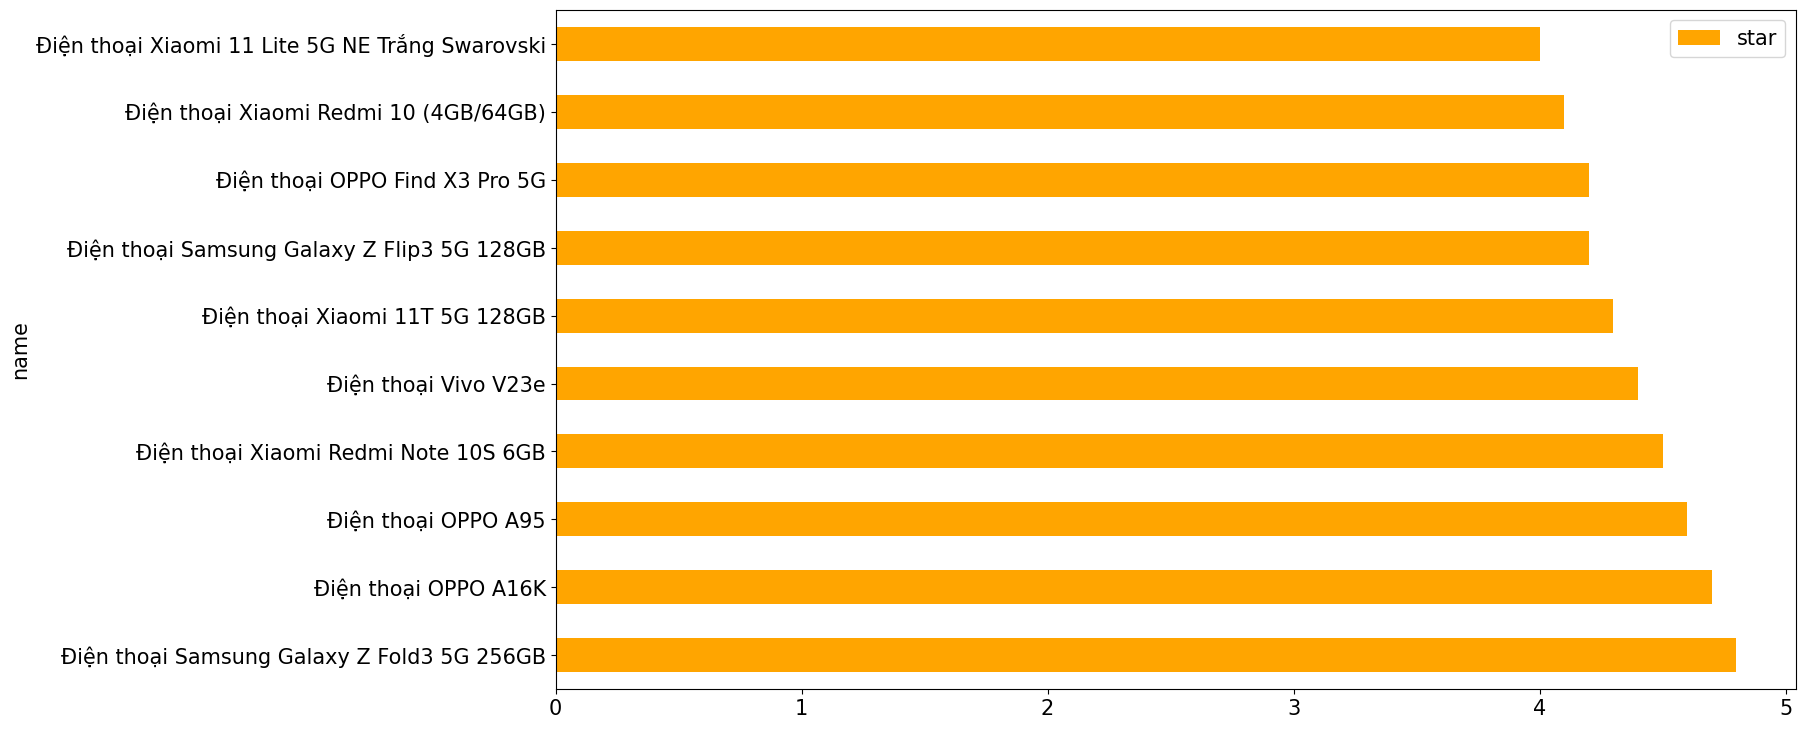

In [13]:
# top 10 sản phẩm đánh giá nhiều sao nhất
data_top10=data_sum.iloc[0:10]
data_top10.plot(kind='barh', y="star", x="name", color = "orange")

In [23]:
data_sum_2 = (data.groupby('name')['star', 'price'].agg({'star': 'count', 'price': 'mean'}).sort_values(by='price', ascending=False)).reset_index()
data_sum_2

<ipython-input-23-a37dbb3c61bd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_sum_2 = (data.groupby('name')['star', 'price'].agg({'star': 'count', 'price': 'mean'}).sort_values(by='price', ascending=False)).reset_index()


,name,star,price
0,Điện thoại Samsung Galaxy Z Fold3 5G 256GB,1,41990000
1,Điện thoại Samsung Galaxy Z Flip3 5G 256GB,1,26990000
2,Điện thoại Samsung Galaxy S21 Ultra 5G 128GB,1,25990000
3,Điện thoại Samsung Galaxy Z Flip3 5G 128GB,1,24990000
4,Điện thoại OPPO Find X3 Pro 5G,1,23990000
...,...,...,...
74,Điện thoại Realme C11 (2021) 4GB/64GB,1,3790000
75,Điện thoại Realme C21Y 3GB,1,3690000
76,Điện thoại OPPO A16K,1,3690000
77,Điện thoại OPPO A15,1,3690000


<AxesSubplot:ylabel='name'>

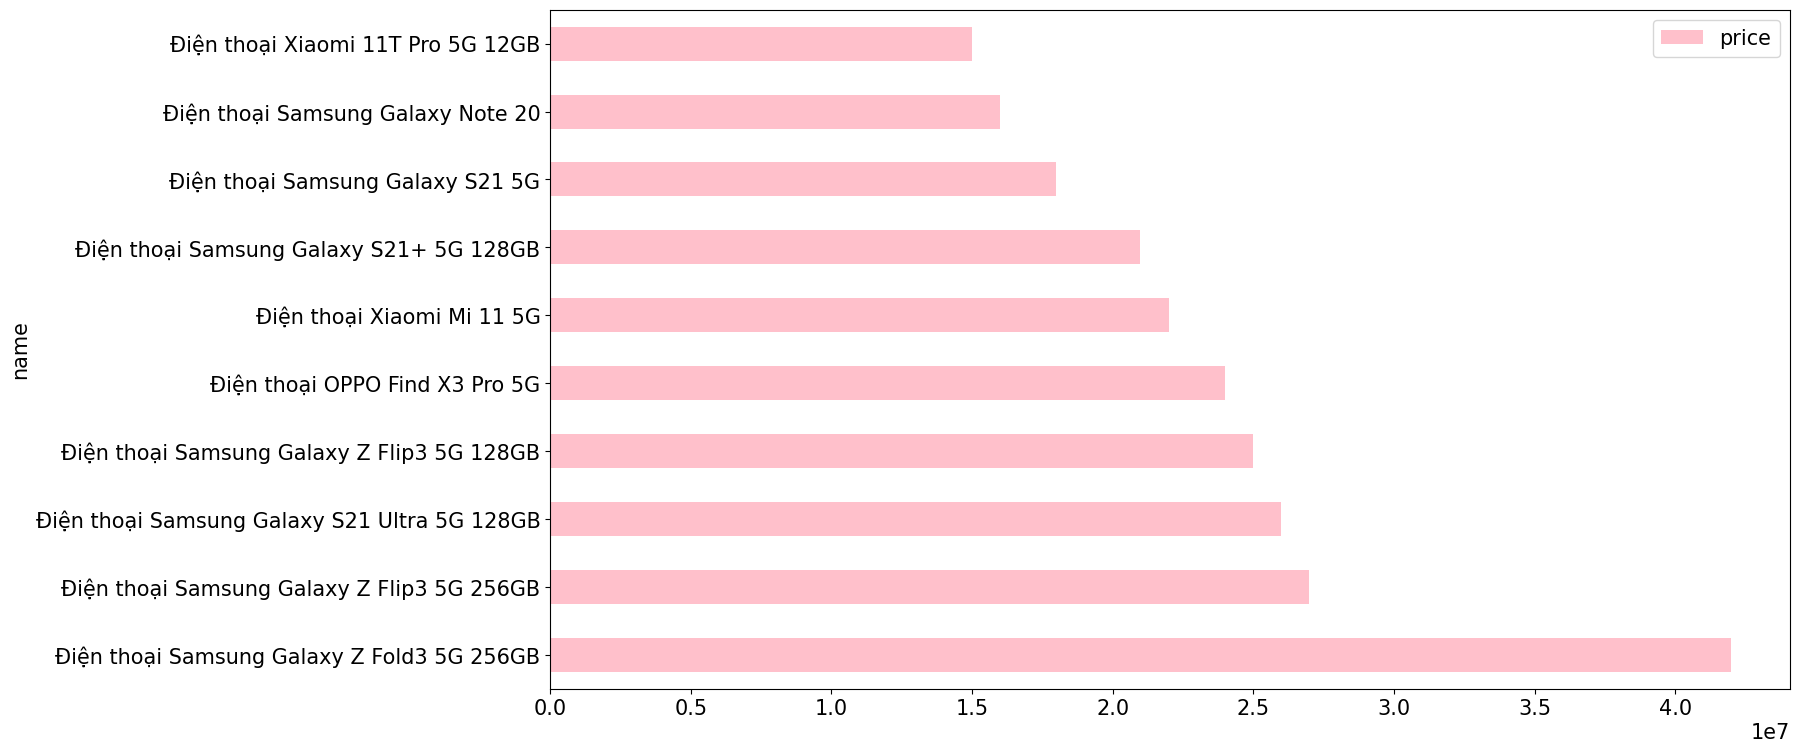

In [24]:
# top 10 sản phẩm có giá cao nhất
data_top10=data_sum_2.iloc[0:10]
data_top10.plot(kind='barh', y="price", x="name", color = "pink")

In [25]:
data_sum_1 = (data.groupby('name')['price', 'star'].agg({'price': 'count', 'star': 'mean'}).sort_values(by='star', ascending=True)).reset_index()
data_sum_1

<ipython-input-25-3f6b9bea269f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_sum_1 = (data.groupby('name')['price', 'star'].agg({'price': 'count', 'star': 'mean'}).sort_values(by='star', ascending=True)).reset_index()


,name,price,star
0,Điện thoại Vivo Y53s,1,2.2
1,Điện thoại Realme C11 (2021) 4GB/64GB,1,2.2
2,Điện thoại OPPO A15s,1,2.3
3,Điện thoại Vivo Y20s,1,2.5
4,Điện thoại Realme C21Y 3GB,1,2.5
...,...,...,...
74,Điện thoại Vivo V23e,1,4.4
75,Điện thoại Xiaomi Redmi Note 10S 6GB,1,4.5
76,Điện thoại OPPO A95,1,4.6
77,Điện thoại OPPO A16K,1,4.7


<AxesSubplot:ylabel='name'>

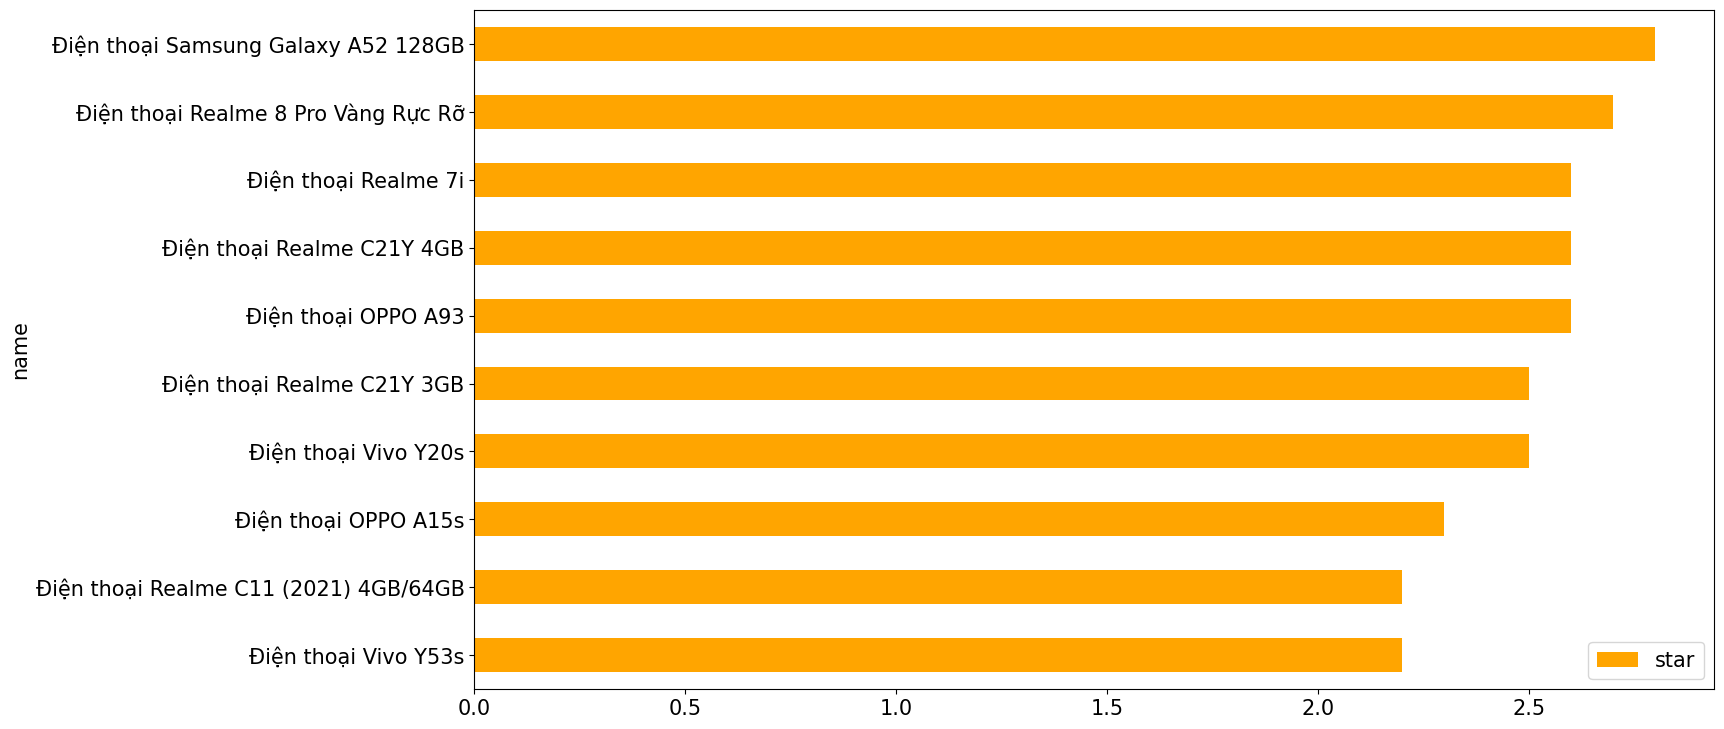

In [22]:
# top 10 sản phẩm có số lượng đánh giá thấp nhất
data_top10=data_sum_1.iloc[0:10]
data_top10.plot(kind='barh', y="star", x="name", color = "orange")

In [26]:
data_sum_3 = (data.groupby('name')['star', 'price'].agg({'star': 'count', 'price': 'mean'}).sort_values(by='price', ascending=True)).reset_index()
data_sum_3

<ipython-input-26-f116514e576f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_sum_3 = (data.groupby('name')['star', 'price'].agg({'star': 'count', 'price': 'mean'}).sort_values(by='price', ascending=True)).reset_index()


,name,star,price
0,Điện thoại Realme C11 (2021),1,2990000
1,Điện thoại OPPO A15,1,3690000
2,Điện thoại OPPO A16K,1,3690000
3,Điện thoại Realme C21Y 3GB,1,3690000
4,Điện thoại Realme C11 (2021) 4GB/64GB,1,3790000
...,...,...,...
74,Điện thoại OPPO Find X3 Pro 5G,1,23990000
75,Điện thoại Samsung Galaxy Z Flip3 5G 128GB,1,24990000
76,Điện thoại Samsung Galaxy S21 Ultra 5G 128GB,1,25990000
77,Điện thoại Samsung Galaxy Z Flip3 5G 256GB,1,26990000


<AxesSubplot:ylabel='name'>

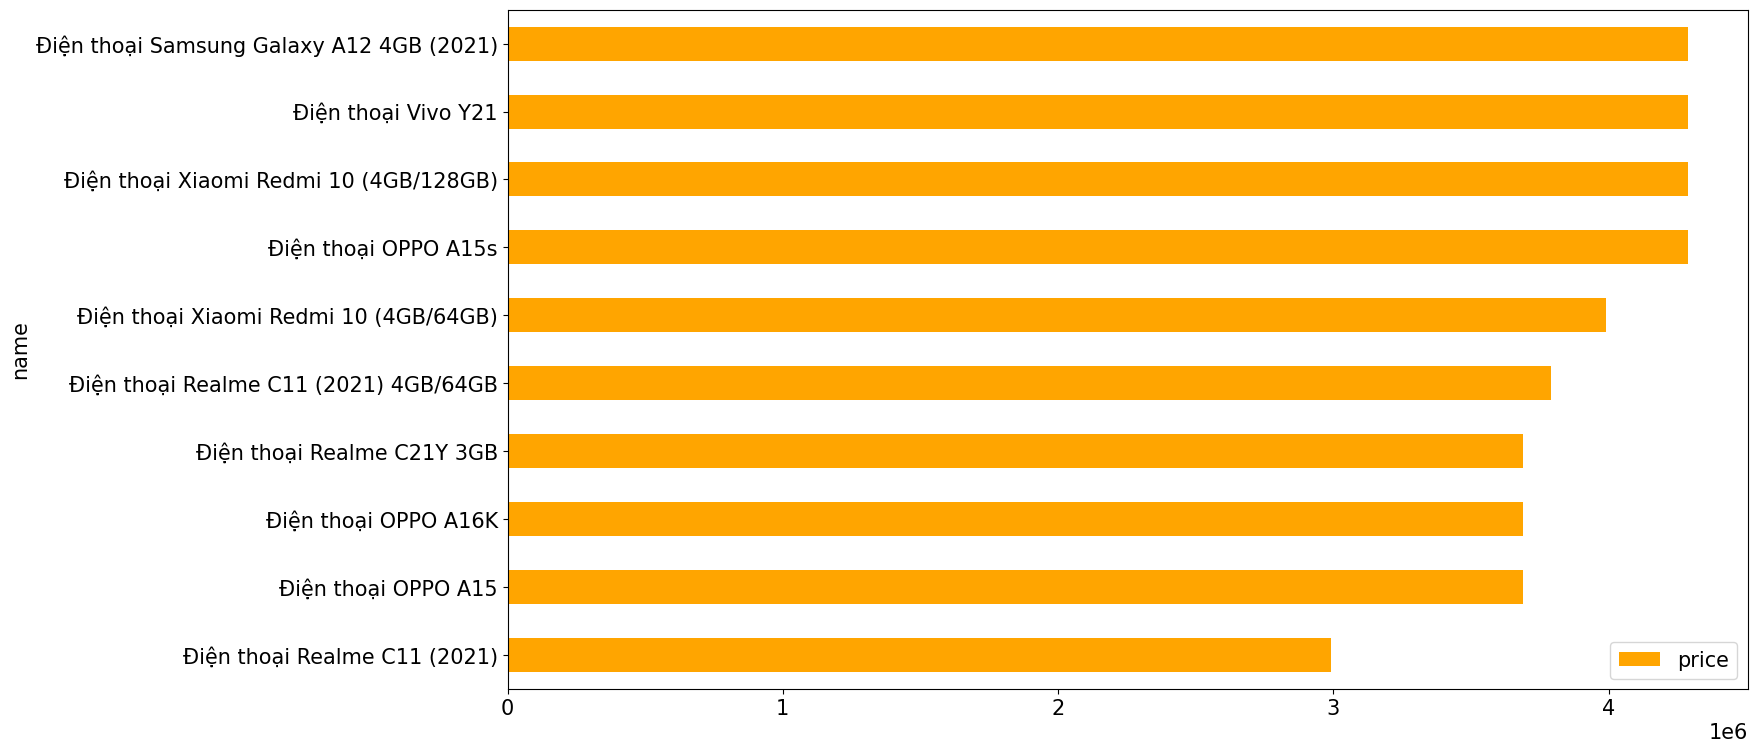

In [27]:
#top 10 sản phẩm có giá thấp nhất
data_top10=data_sum_3.iloc[0:10]
data_top10.plot(kind='barh', y="price", x="name", color = "orange")

<AxesSubplot:>

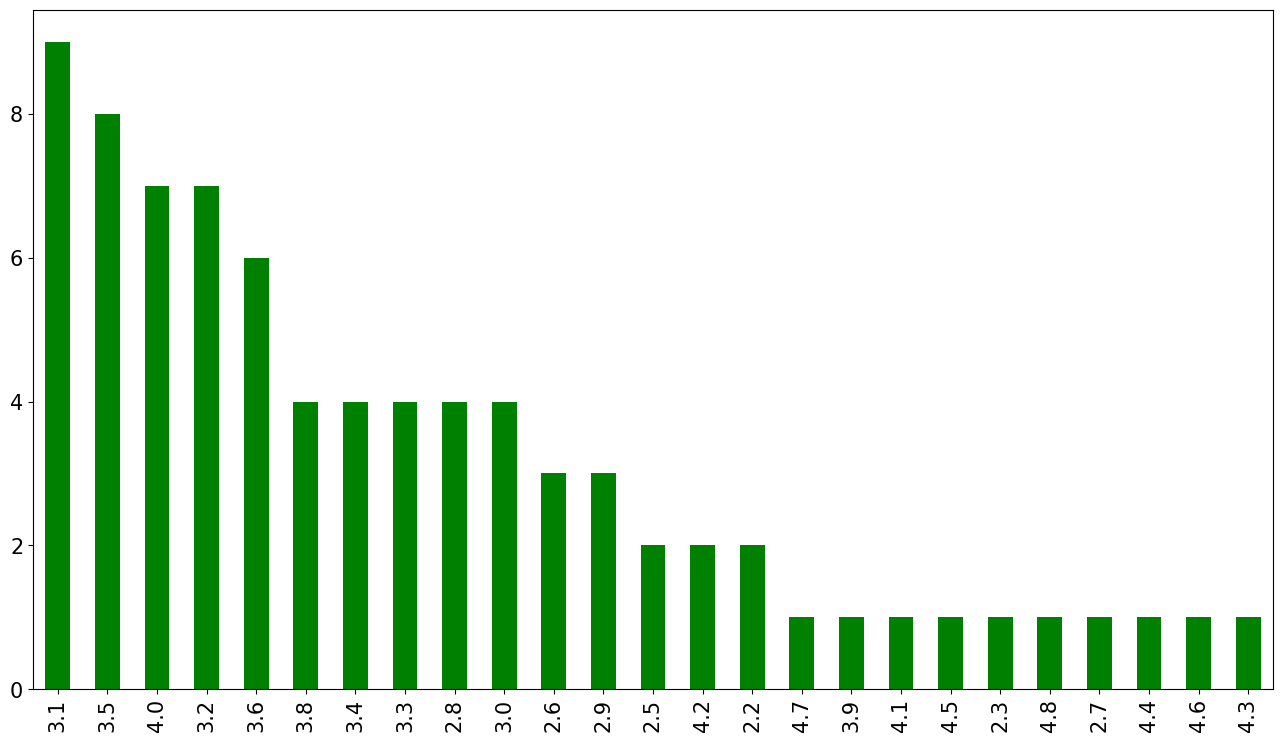

In [231]:
data['star'].value_counts().plot.bar(color = "green")

<AxesSubplot:>

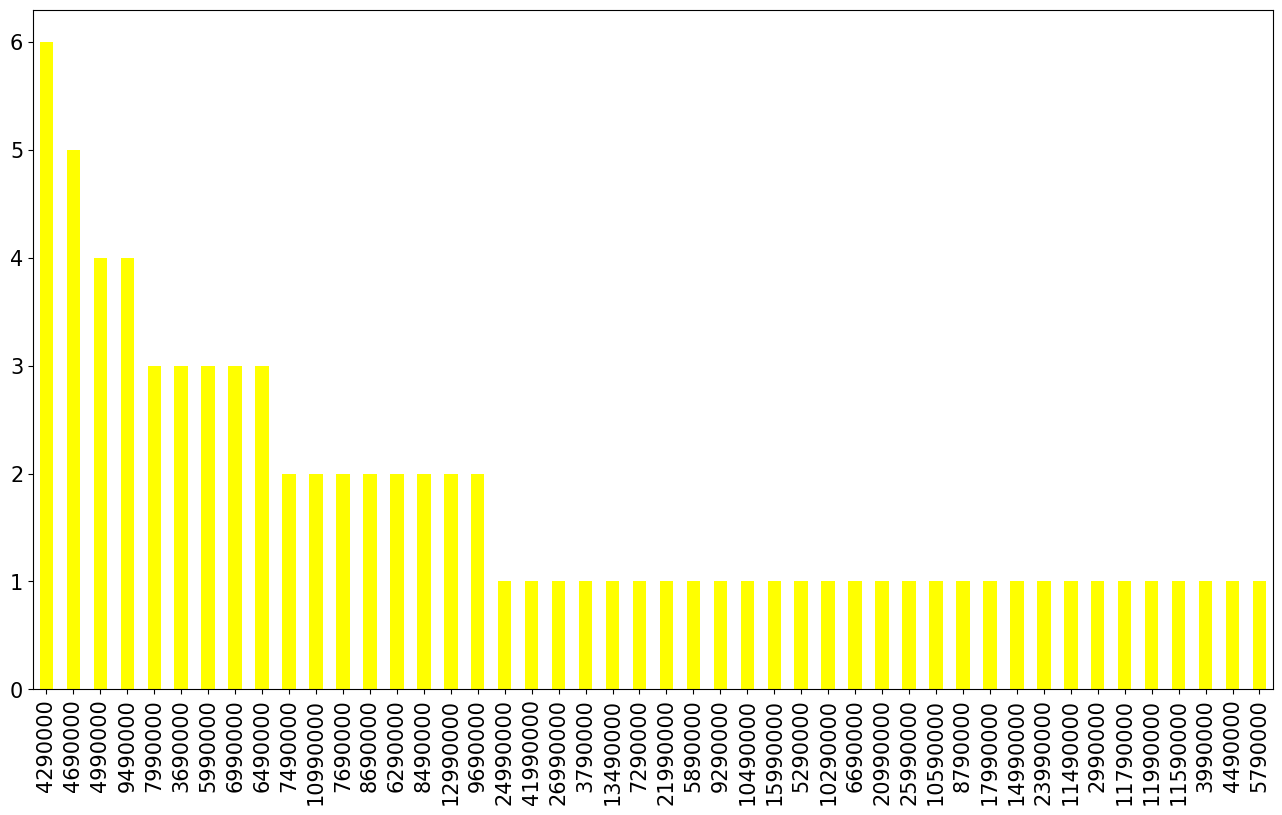

In [232]:
data['price'].value_counts().plot.bar(color = "yellow")

Text(0, 0.5, 'Count')

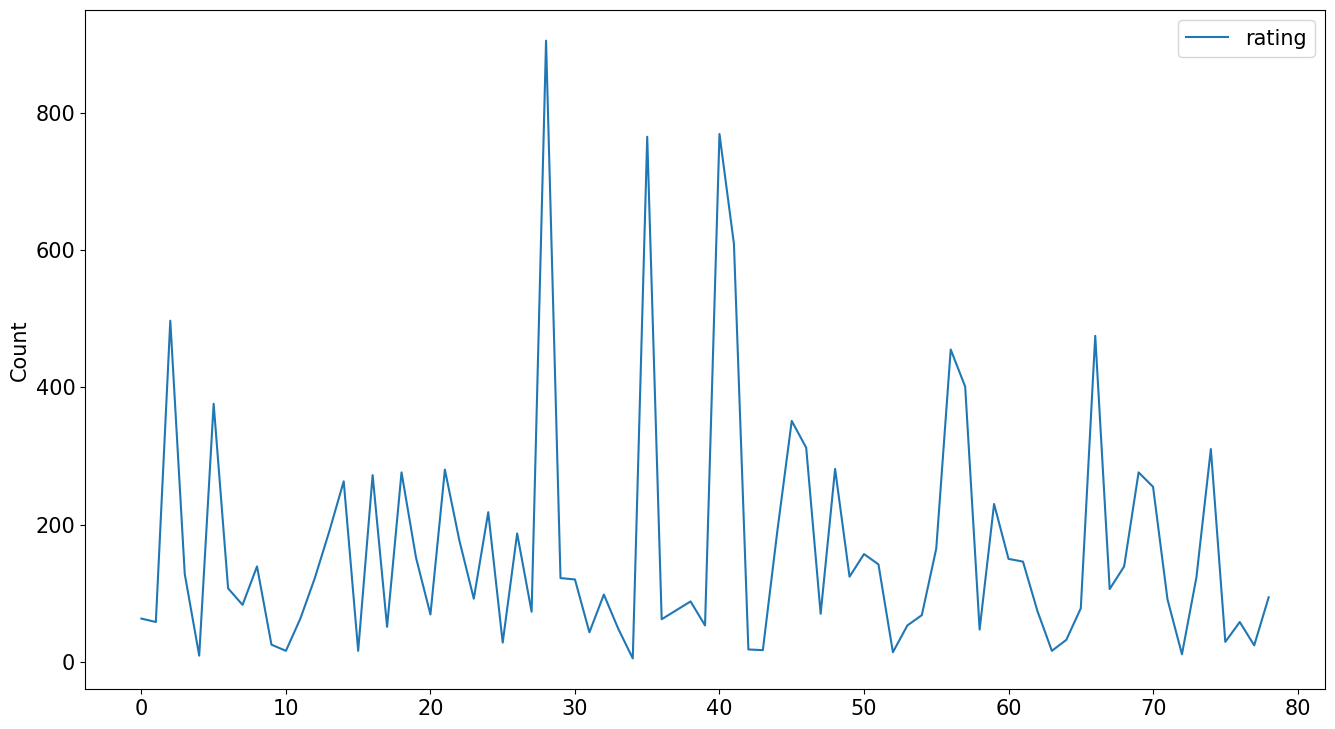

In [233]:
data[[ "rating"]].plot()
plt.ylabel('Count')

Text(0, 0.5, 'Count')

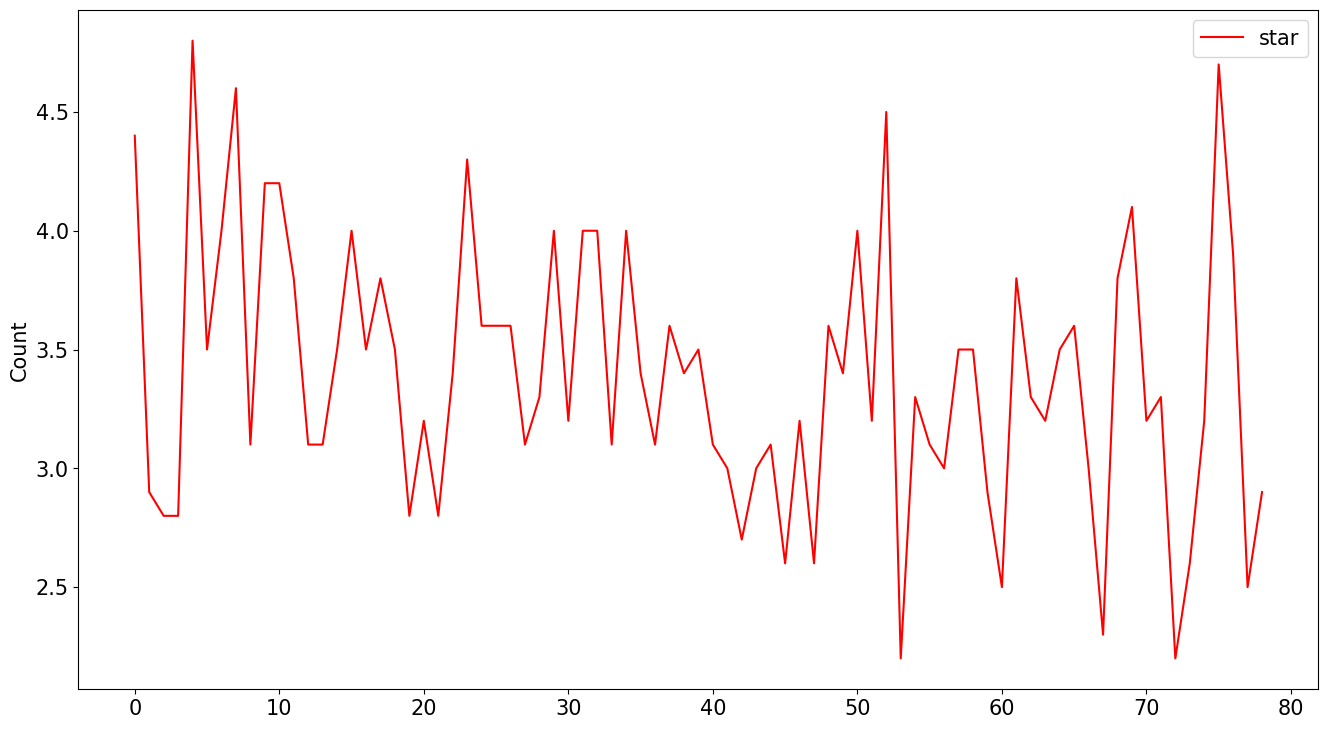

In [235]:
data[["star"]].plot(color = "red")
plt.ylabel('Count')

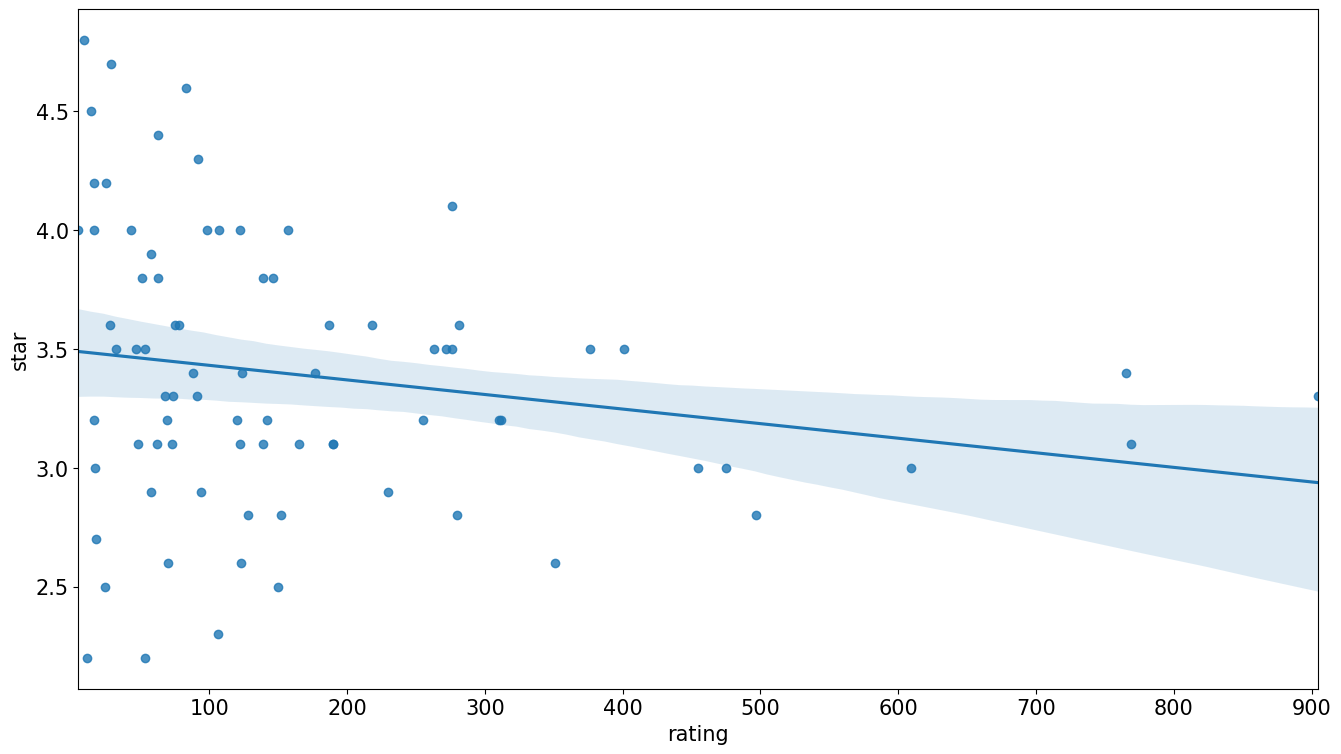

In [237]:
sns.regplot(x="rating", y="star", data = data)
plt.show()